In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
test_image = cv2.imread('s001-00_img.bmp')
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
print('Faces found: ', len(faces_rects))
plt.imshow(test_image_gray, cmap='gray')

NameError: name 'faces_rects' is not defined

In [55]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

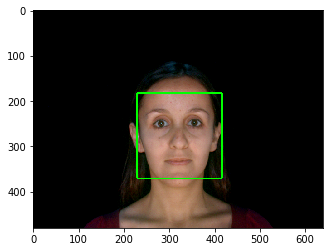

In [57]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(convertToRGB(test_image))

In [69]:
def detect_faces(cascade, test_image, scaleFactor = 2.8):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return image_copy

neutral


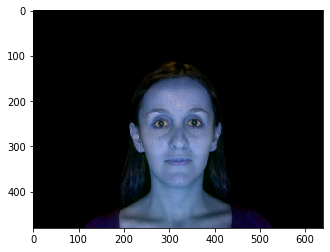

In [139]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import imutils
import sys

img_path = 's001-00_img.bmp'

haar_cascade_face = cv2.CascadeClassifier('haarcascade/haarcascade_frontalface_default.xml')
#faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 2.8, minNeighbors = 5)
emotion_classifier = load_model('models/_mini_XCEPTION.102-0.66.hdf5', compile=False)
EMOTIONS = ["angry","disgust","scared", "happy", "sad", "surprised","neutral"]

orig_frame = cv2.imread(img_path)
frame = cv2.imread(img_path, 0)

plt.imshow(orig_frame)

#call the function to detect faces
#faces = detect_faces(haar_cascade_face, test_image2)
faces = haar_cascade_face.detectMultiScale(frame,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)

if len(faces) > 0:
    faces = sorted(faces, reverse=True,key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
    (fX, fY, fW, fH) = faces
    roi = frame[fY:fY + fH, fX:fX + fW]
    roi = cv2.resize(roi, (64, 64))
    roi = roi.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)
    preds = emotion_classifier.predict(roi)[0]
    emotion_probability = np.max(preds)
    label = EMOTIONS[preds.argmax()]
    cv2.putText(orig_frame, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
    cv2.rectangle(orig_frame, (fX, fY), (fX + fW, fY + fH),(0, 0, 255), 2)

#cv2.imshow('test_face', orig_frame)
#cv2.imwrite('test_output/'+img_path.split('/')[-1],orig_frame)
print(label)
#cv2.destroyAllWindows()


#plt.imshow(convertToRGB(faces))


In [88]:
pip install tensorflow --user

Looking in indexes: http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple, http://pypi.servicos.bb.com.br/simple
     |████████████████████████████████| 86.3MB 13.8MB/s 
     |████████████████████████████████| 2.3MB 35.2MB/s 
     |████████████████████████████████| 3.8MB 29.7MB/s 
     |████████████████████████████████| 71kB 32.0MB/s 
     |████████████████████████████████| 112kB 33.3MB/s 
     |████████████████████████████████| 61kB 25.4MB/s 
     |████████████████████████████████| 450kB 34.8MB/s 
     |████████████████████████████████| 583kB 32.7MB/s 
     |████████████████████████████████| 92kB 36.2MB/s 
     |████████████████████████████████| 327kB 27.9MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
    Running setup.py install for gast ... done
    Running setup.py install for wrapt ... done
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn

In [81]:
pip install imutils --user

Looking in indexes: http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple, http://pypi.servicos.bb.com.br/simple
    Running setup.py install for imutils ... done
Note: you may need to restart the kernel to use updated packages.
